In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
sns.set_theme(
    style="whitegrid",     
    palette="deep",        
    font_scale=1.2         
)

plt.rcParams['figure.figsize'] = (8, 6)     
plt.rcParams['axes.titlesize'] = 14         
plt.rcParams['axes.labelsize'] = 12         
plt.rcParams['xtick.labelsize'] = 10         
plt.rcParams['ytick.labelsize'] = 10         
plt.rcParams['axes.spines.top'] = False     
plt.rcParams['axes.spines.right'] = False   

## Exploratory Data Analysis

In [54]:
df_train = pd.read_csv('labelled_train.csv')

In [55]:
df_train.head()

,processId,threadId,parentProcessId,userId,mountNamespace,argsNum,returnValue,sus_label
0,381,7337,1,100,4026532231,5,0,1
1,381,7337,1,100,4026532231,1,0,1
2,381,7337,1,100,4026532231,0,0,1
3,7347,7347,7341,0,4026531840,2,-2,1
4,7347,7347,7341,0,4026531840,4,0,1


In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763144 entries, 0 to 763143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   processId        763144 non-null  int64
 1   threadId         763144 non-null  int64
 2   parentProcessId  763144 non-null  int64
 3   userId           763144 non-null  int64
 4   mountNamespace   763144 non-null  int64
 5   argsNum          763144 non-null  int64
 6   returnValue      763144 non-null  int64
 7   sus_label        763144 non-null  int64
dtypes: int64(8)
memory usage: 46.6 MB


In [57]:
df_train.describe()

,processId,threadId,parentProcessId,userId,mountNamespace,argsNum,returnValue,sus_label
count,763144.000000,763144.000000,763144.000000,763144.000000,7.631440e+05,763144.000000,763144.000000,763144.000000
mean,6814.763308,6820.265241,1882.216609,2.279034,4.026532e+09,2.672082,17.520924,0.001663
std,1948.871187,1937.068333,2215.563094,37.416576,1.649030e+02,1.340906,318.596662,0.040744
min,1.000000,1.000000,0.000000,0.000000,4.026532e+09,0.000000,-115.000000,0.000000
25%,7313.000000,7313.000000,187.000000,0.000000,4.026532e+09,1.000000,0.000000,0.000000
50%,7365.000000,7365.000000,1385.000000,0.000000,4.026532e+09,3.000000,0.000000,0.000000
75%,7415.000000,7415.000000,1648.000000,0.000000,4.026532e+09,4.000000,4.000000,0.000000
max,8619.000000,8619.000000,7672.000000,1000.000000,4.026532e+09,5.000000,8289.000000,1.000000


### Class Distribution

In [58]:
label_counts = df_train['sus_label'].value_counts()
label_percentage = df_train['sus_label'].value_counts(normalize=True) * 100

print(f"Benign (0) vs. Malicious (1) event counts:\n{label_counts}")
print(f"\nBenign (0) vs. Malicious (1) event percentages:\n{label_percentage}")

Benign (0) vs. Malicious (1) event counts:
sus_label
0    761875
1      1269
Name: count, dtype: int64

Benign (0) vs. Malicious (1) event percentages:
sus_label
0    99.833714
1     0.166286
Name: proportion, dtype: float64


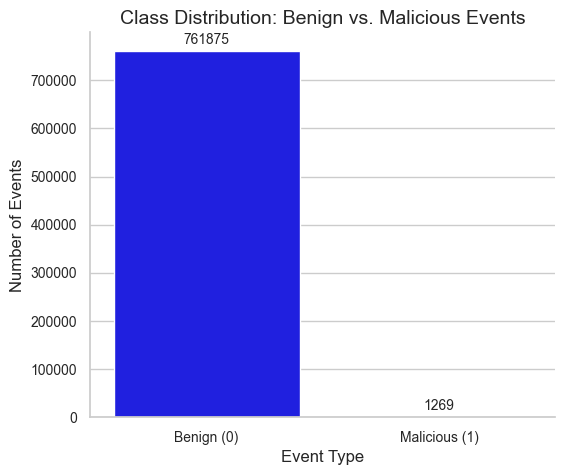

In [59]:
x = ['Benign (0)', 'Malicious (1)']
y = label_counts.values
colors = ['blue', 'red']
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=x, y=y, palette=colors)

for i, val in enumerate(y):
    ax.text(i, val + max(y)*0.01, str(val), ha='center', va='bottom', fontsize=10)

plt.title("Class Distribution: Benign vs. Malicious Events")
plt.xlabel("Event Type")
plt.ylabel("Number of Events")
plt.show()

### Correlation Matrix

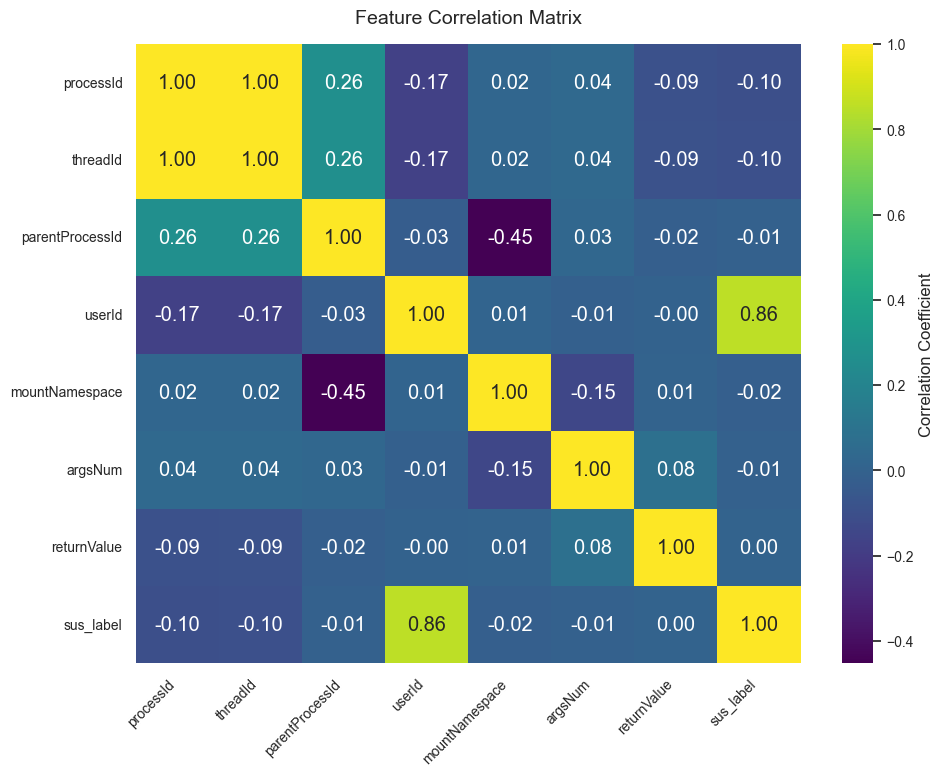

In [60]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,              
    fmt=".2f",               
    cmap="viridis",          
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title("Feature Correlation Matrix", fontsize=14, pad=15)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Preprocessing

In [61]:
from sklearn.preprocessing import StandardScaler
import torch
import numpy as np

In [62]:
train_df = pd.read_csv('labelled_train.csv')
val_df = pd.read_csv('labelled_validation.csv')
test_df = pd.read_csv('labelled_test.csv')

In [63]:
print(f"Training set shape: {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")
print(f"Test set shape: {test_df.shape}")

Training set shape: (763144, 8)
Validation set shape: (188967, 8)
Test set shape: (188967, 8)


### Separate X and y

In [64]:
X_train = train_df.drop('sus_label', axis=1).values
y_train = train_df['sus_label'].values

X_val = val_df.drop('sus_label', axis=1).values
y_val = val_df['sus_label'].values

X_test = test_df.drop('sus_label', axis=1).values
y_test = test_df['sus_label'].values

In [65]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train: (763144, 7)
Shape of y_train: (763144,)


### Feature Scaling

In [66]:
scaler = StandardScaler()

In [67]:
X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [68]:
print(f"Mean of scaled training data (first 5 features): {np.mean(X_train_scaled, axis=0)[:5]}")
print(f"Std dev of scaled training data (first 5 features): {np.std(X_train_scaled, axis=0)[:5]}")

Mean of scaled training data (first 5 features): [-2.28224602e-16 -1.82564784e-16  9.23624367e-17 -3.44031455e-18
 -5.73062616e-10]
Std dev of scaled training data (first 5 features): [1. 1. 1. 1. 1.]


### PyTorch Tensors

In [69]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

In [70]:
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [71]:
print(f"Shape of X_train_tensor: {X_train_tensor.shape} | Dtype: {X_train_tensor.dtype}")
print(f"Shape of y_train_tensor: {y_train_tensor.shape} | Dtype: {y_train_tensor.dtype}")

Shape of X_train_tensor: torch.Size([763144, 7]) | Dtype: torch.float32
Shape of y_train_tensor: torch.Size([763144, 1]) | Dtype: torch.float32


## Building a Deep Learning Model

In [72]:
import torch.nn as nn
import torch.optim as optim

### Neural Network Architecture

In [73]:
num_features = X_train_tensor.shape[1]

In [74]:
model = nn.Sequential(
    nn.Linear(num_features, 128), # Input Layer
    nn.ReLU(),                    # Activation Func. 1
    nn.Linear(128, 64),           # Hidden Layer
    nn.ReLU(),                    # Activation Func. 2
    nn.Linear(64, 1)              # Output Layer
)

In [75]:
print("Model Architecture:")
print(model)

Model Architecture:
Sequential(
  (0): Linear(in_features=7, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=1, bias=True)
)


### Loss Function

In [76]:
criterion = nn.BCEWithLogitsLoss()
print(f"Loss Function: {criterion}")

Loss Function: BCEWithLogitsLoss()


### Optimizer

In [77]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
print(f"Optimizer: {optimizer}")

Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


## Training, Validation, and Evaluation

In [78]:
from torch.utils.data import DataLoader, TensorDataset
from torchmetrics.classification import BinaryAccuracy, BinaryPrecision, BinaryRecall, BinaryF1Score, BinaryConfusionMatrix

### DataLoaders 

In [79]:
BATCH_SIZE = 64

In [80]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [81]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [82]:
print(f"Number of batches in train_loader: {len(train_loader)}")

Number of batches in train_loader: 11925


### Model Training

In [83]:
NUM_EPOCHS = 10 
epoch_losses = [] 

In [84]:
for epoch in range(NUM_EPOCHS):
    model.train() 
    
    current_epoch_loss = 0.0
    
    for features, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        current_epoch_loss += loss.item()
        
    avg_epoch_loss = current_epoch_loss / len(train_loader)
    epoch_losses.append(avg_epoch_loss)
    
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Average Loss: {avg_epoch_loss:.4f}")

Epoch [1/10], Average Loss: 0.0038
Epoch [2/10], Average Loss: 0.0020
Epoch [3/10], Average Loss: 0.0019
Epoch [4/10], Average Loss: 0.0017
Epoch [5/10], Average Loss: 0.0017
Epoch [6/10], Average Loss: 0.0016
Epoch [7/10], Average Loss: 0.0015
Epoch [8/10], Average Loss: 0.0014
Epoch [9/10], Average Loss: 0.0014
Epoch [10/10], Average Loss: 0.0013


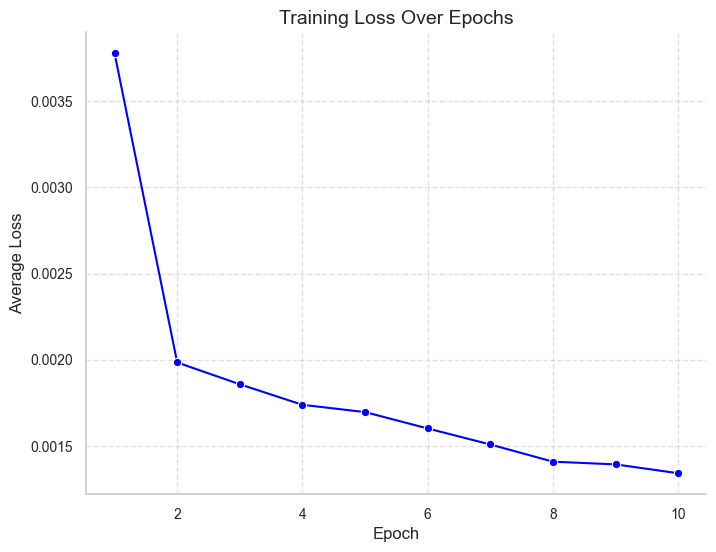

In [85]:
epochs = range(1, NUM_EPOCHS + 1)
losses = epoch_losses

plt.figure(figsize=(8, 6))
sns.lineplot(x=epochs, y=losses, marker="o", color="blue")

plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

### Model Evaluation

In [86]:
model.eval()

Sequential(
  (0): Linear(in_features=7, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=1, bias=True)
)

In [87]:
accuracy = BinaryAccuracy()
precision = BinaryPrecision()
recall = BinaryRecall()
f1_score = BinaryF1Score()

In [88]:
datasets = {
    'Training': train_loader,
    'Validation': val_loader,
    'Testing': test_loader
}

In [89]:
results = []

with torch.no_grad(): 
    for d_name, d_loader in datasets.items():
        all_preds = []
        all_labels = []
        
        for features, labels in d_loader:
            logits = model(features)
            
            probs = torch.sigmoid(logits)
            preds = probs.round()
            
            all_preds.append(preds)
            all_labels.append(labels)
            
        all_preds = torch.cat(all_preds)
        all_labels = torch.cat(all_labels)
        
        acc = accuracy(all_preds, all_labels).item()
        prec = precision(all_preds, all_labels).item()
        rec = recall(all_preds, all_labels).item()
        f1 = f1_score(all_preds, all_labels).item()
        
        results.append({'Dataset': d_name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1})
        
        if d_name == 'Testing':
            bcm = BinaryConfusionMatrix()
            conf_matrix = bcm(all_preds, all_labels).numpy()

In [90]:
results_df = pd.DataFrame(results)
print(results_df)

      Dataset  Accuracy  Precision    Recall  F1 Score
0    Training  0.999689        1.0  0.813239  0.897001
1  Validation  0.999952        1.0  0.988550  0.994242
2     Testing  0.932639        1.0  0.925761  0.961449


TN (Top-Left): Correctly predicted Benign
FP (Top-Right): Incorrectly predicted Malicious (False Alarm)
FN (Bottom-Left): Incorrectly predicted Benign (Missed Threat!)
TP (Bottom-Right): Correctly predicted Malicious


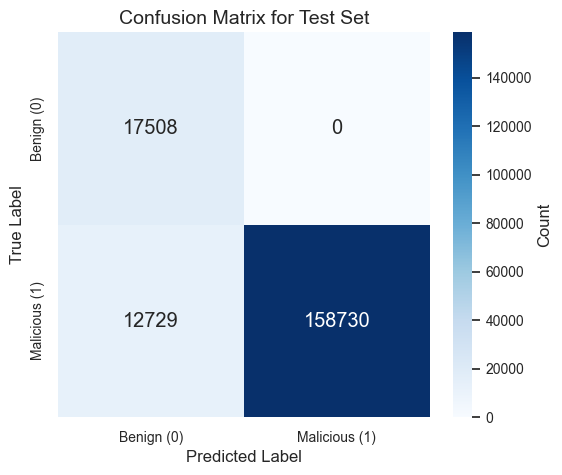

In [91]:
print("TN (Top-Left): Correctly predicted Benign")
print("FP (Top-Right): Incorrectly predicted Malicious (False Alarm)")
print("FN (Bottom-Left): Incorrectly predicted Benign (Missed Threat!)")
print("TP (Bottom-Right): Correctly predicted Malicious")

labels = ['Benign (0)', 'Malicious (1)']

plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_matrix,
    annot=True,           
    fmt="d",              
    cmap="Blues",         
    xticklabels=labels,
    yticklabels=labels,
    cbar_kws={'label': 'Count'}   
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Test Set")
plt.show()
